## Problem statement 
we have to classify tumor as Benign(B) and Malignant (M)

* Problem Type : Binary Classification
* Dependent Variable : "Diagnosis"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Exploration & Feature Engineering

In [4]:
print("No of features: ",df.shape[1])
print("No of Datapoints: ",df.shape[0])

No of features:  33
No of Datapoints:  569


### Checking for missing values

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

* Feature name : Unnamed: 32 have all null values so i am dropping it.
* We dont require id also.

In [6]:
df = df.drop("Unnamed: 32",axis=1)
df = df.drop("id",axis=1)

In [7]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Checking Data is balanced or imbalanced

B    357
M    212
Name: diagnosis, dtype: int64


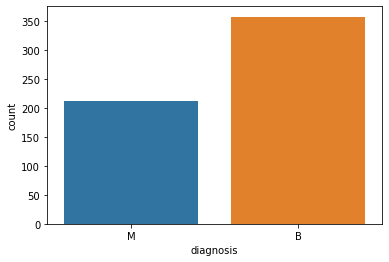

In [9]:
sns.countplot("diagnosis",data=df,label="Count")
print(df["diagnosis"].value_counts())

* We can see the Class M has 212 datapoints and Class B has 357 datapoints
* So data is falling towards imbalance side

### separating dependent variable and independent variable

* x contains independent variables
* y contains dependent variables

In [10]:
y = df["diagnosis"]
x = df.drop(["diagnosis"], axis=1)

In [11]:
print(x.shape)
print(y.shape)


(569, 30)
(569,)


In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
#sns.pairplot(df,hue="diagnosis")

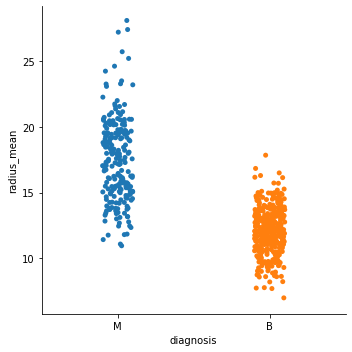

In [14]:
sns.catplot(x="diagnosis",y = "radius_mean",data=df)

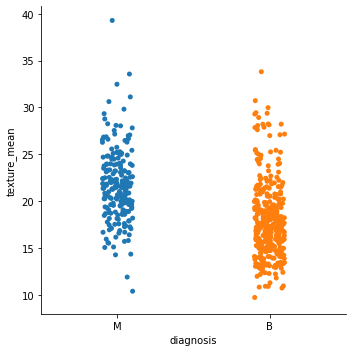

In [15]:
sns.catplot(x="diagnosis",y = "texture_mean",data=df)

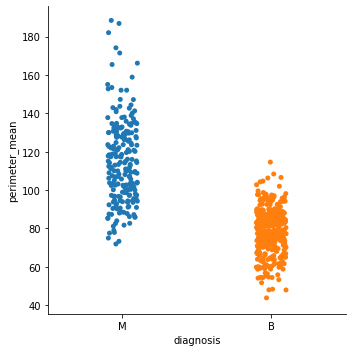

In [16]:

sns.catplot(x="diagnosis",y = "perimeter_mean",data=df)

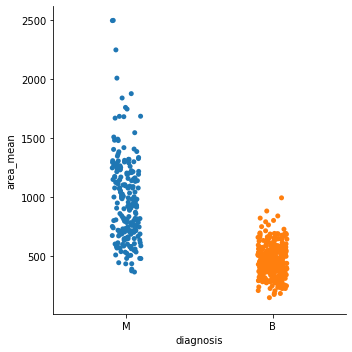

In [17]:
sns.catplot(x="diagnosis",y = "area_mean",data=df)

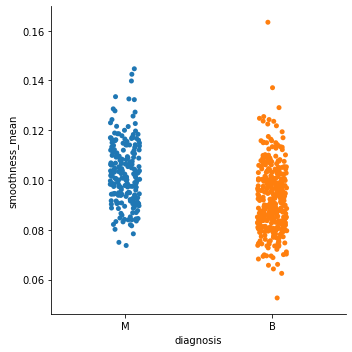

In [18]:
sns.catplot(x="diagnosis",y = "smoothness_mean",data=df)

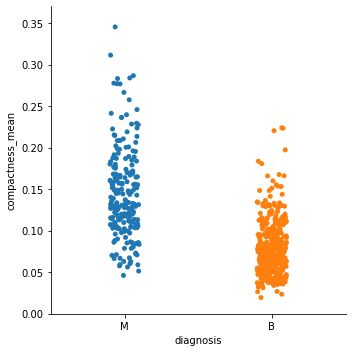

In [19]:
sns.catplot(x="diagnosis",y = "compactness_mean",data=df)

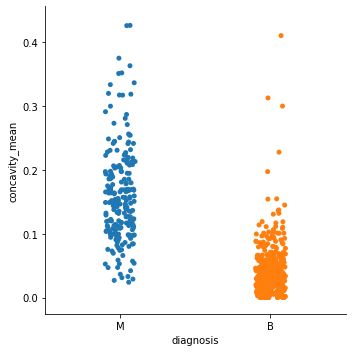

In [20]:
sns.catplot(x="diagnosis",y = "concavity_mean",data=df)

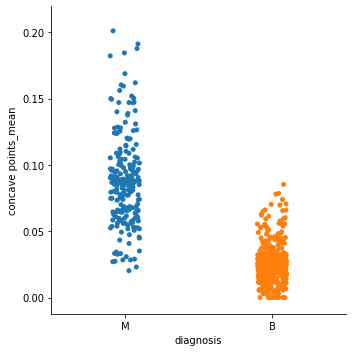

In [21]:
sns.catplot(x="diagnosis",y = "concave points_mean",data=df)

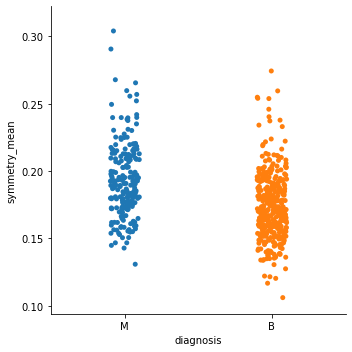

In [22]:
sns.catplot(x="diagnosis",y = "symmetry_mean",data=df)

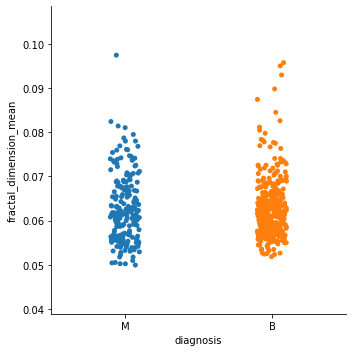

In [23]:
sns.catplot(x="diagnosis",y = "fractal_dimension_mean",data=df)

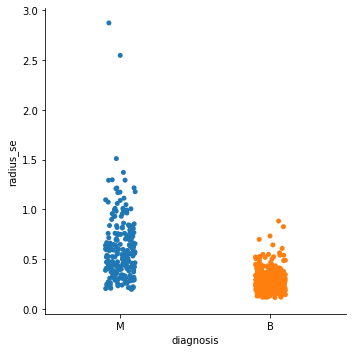

In [24]:
sns.catplot(x="diagnosis",y = "radius_se",data=df)

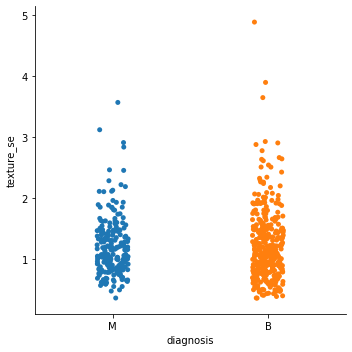

In [25]:
sns.catplot(x="diagnosis",y = "texture_se",data=df)

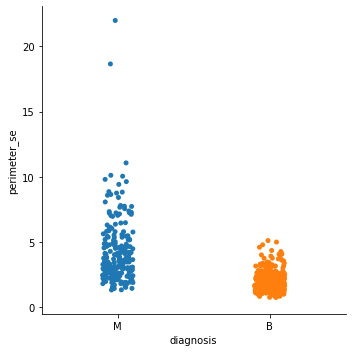

In [26]:
sns.catplot(x="diagnosis",y = "perimeter_se",data=df)

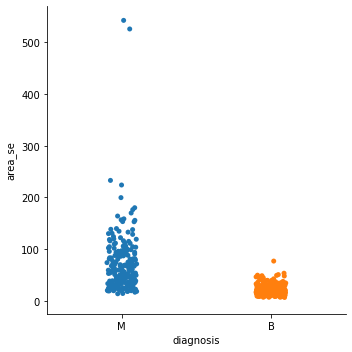

In [27]:
sns.catplot(x="diagnosis",y = "area_se",data=df)

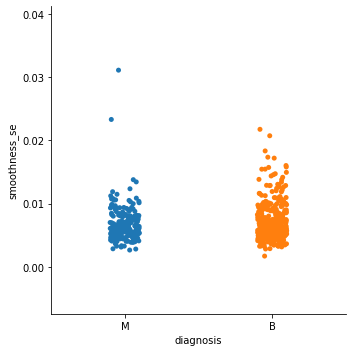

In [28]:
sns.catplot(x="diagnosis",y = "smoothness_se",data=df)

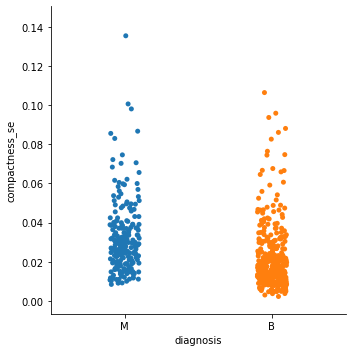

In [29]:
sns.catplot(x="diagnosis",y = "compactness_se",data=df)

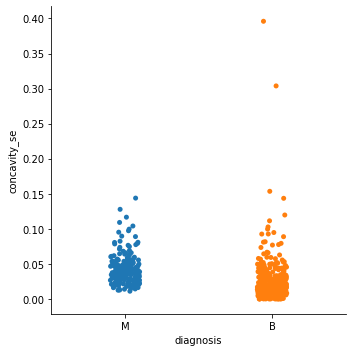

In [30]:
sns.catplot(x="diagnosis",y = "concavity_se",data=df)

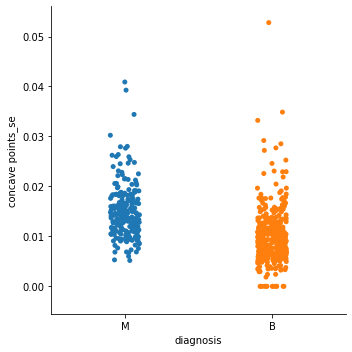

In [31]:
sns.catplot(x="diagnosis",y = "concave points_se",data=df)

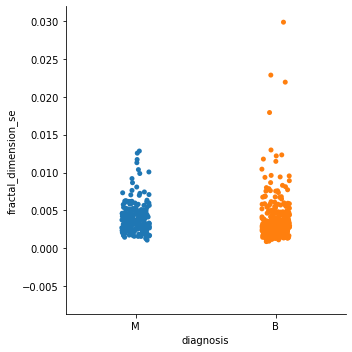

In [32]:
sns.catplot(x="diagnosis",y = "fractal_dimension_se",data=df)

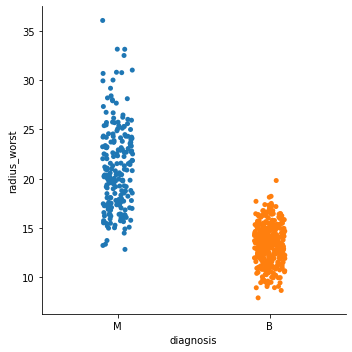

In [33]:
sns.catplot(x="diagnosis",y = "radius_worst",data=df)

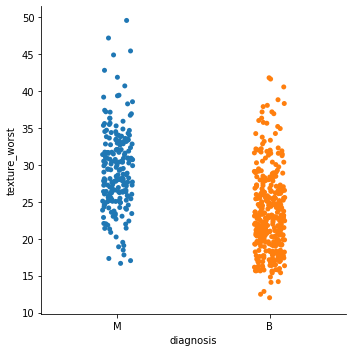

In [34]:
sns.catplot(x="diagnosis",y = "texture_worst",data=df)

In [35]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

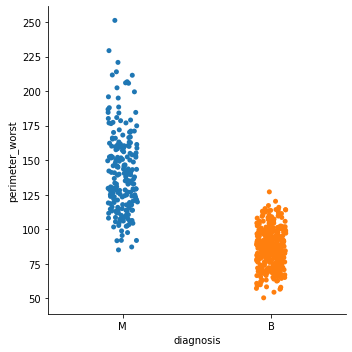

In [36]:
sns.catplot(x="diagnosis",y = "perimeter_worst",data=df)

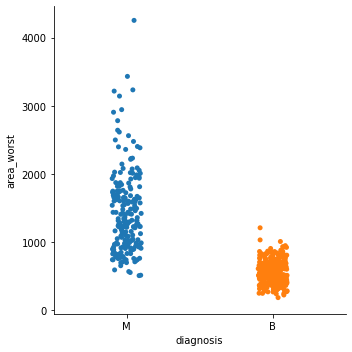

In [37]:
sns.catplot(x="diagnosis",y = "area_worst",data=df)

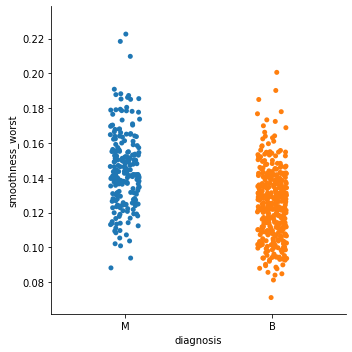

In [38]:
sns.catplot(x="diagnosis",y = "smoothness_worst",data=df)

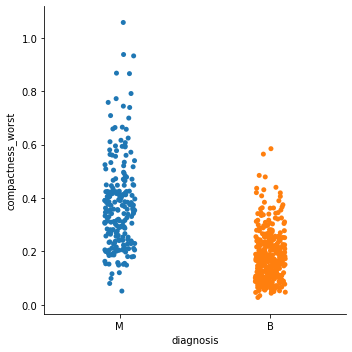

In [39]:
sns.catplot(x="diagnosis",y = "compactness_worst",data=df)

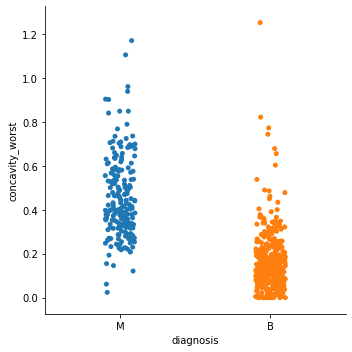

In [40]:
sns.catplot(x="diagnosis",y = "concavity_worst",data=df)

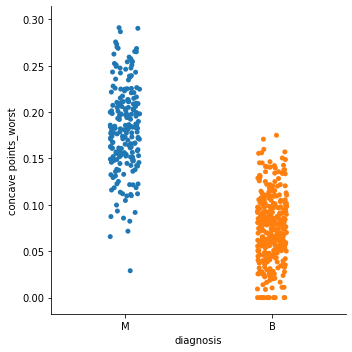

In [41]:
sns.catplot(x="diagnosis",y = "concave points_worst",data=df)

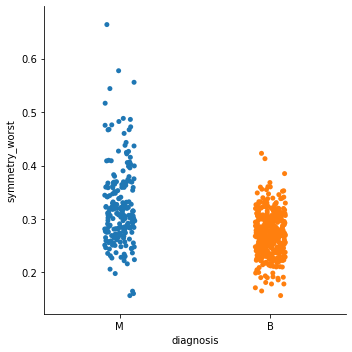

In [42]:
sns.catplot(x="diagnosis",y = "symmetry_worst",data=df)

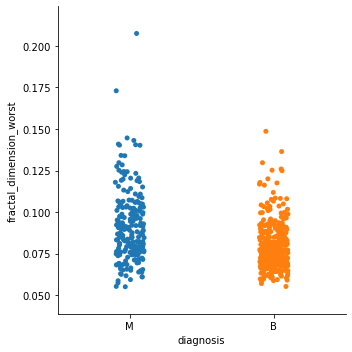

In [43]:
sns.catplot(x="diagnosis",y = "fractal_dimension_worst",data=df)

In [44]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

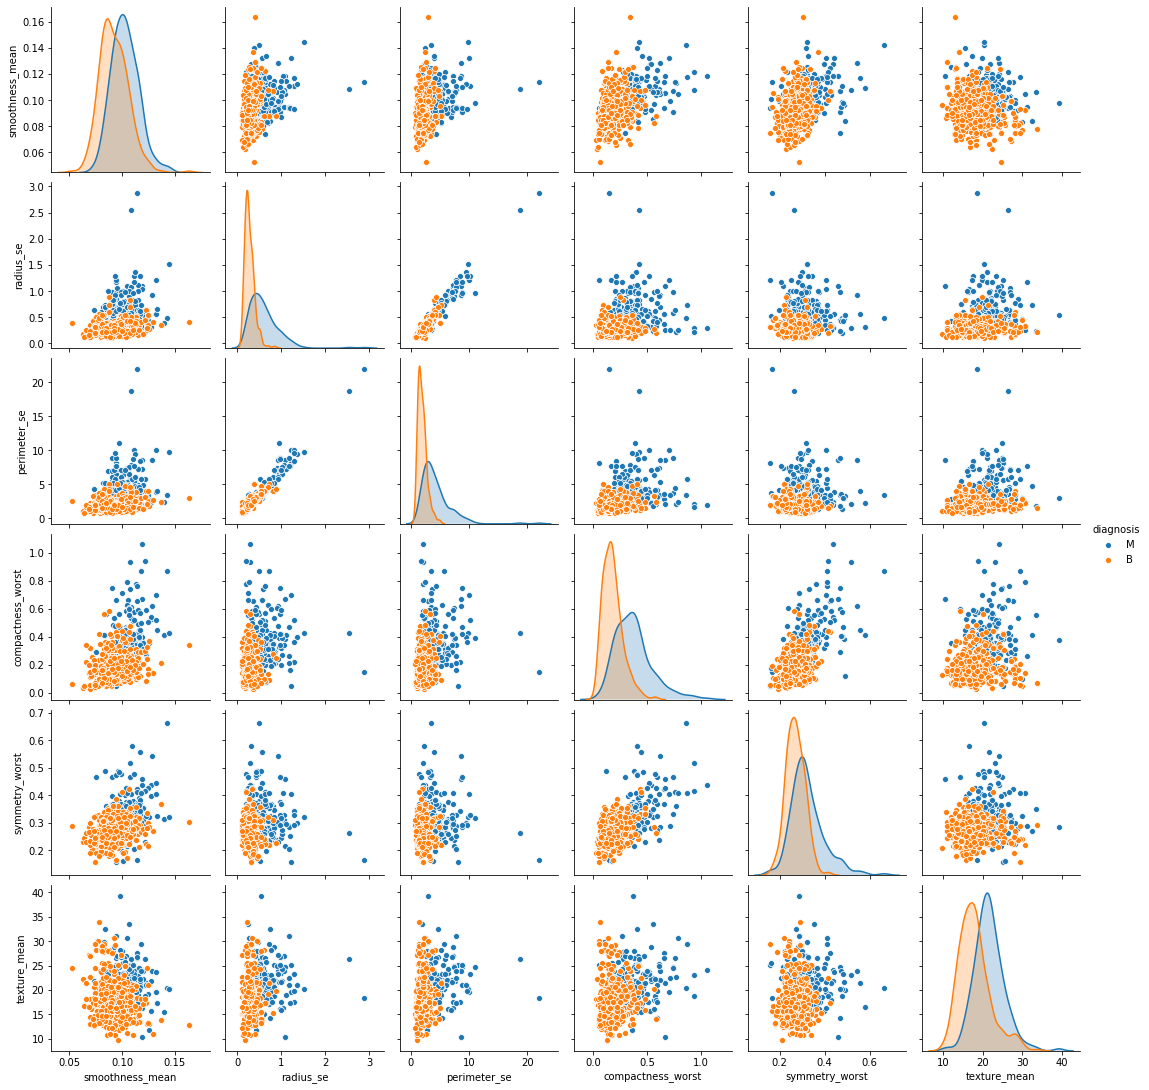

In [45]:
sns.pairplot(df[["smoothness_mean","radius_se","perimeter_se","compactness_worst","symmetry_worst","diagnosis","texture_mean"]],hue="diagnosis")

In [46]:
df.columns





Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

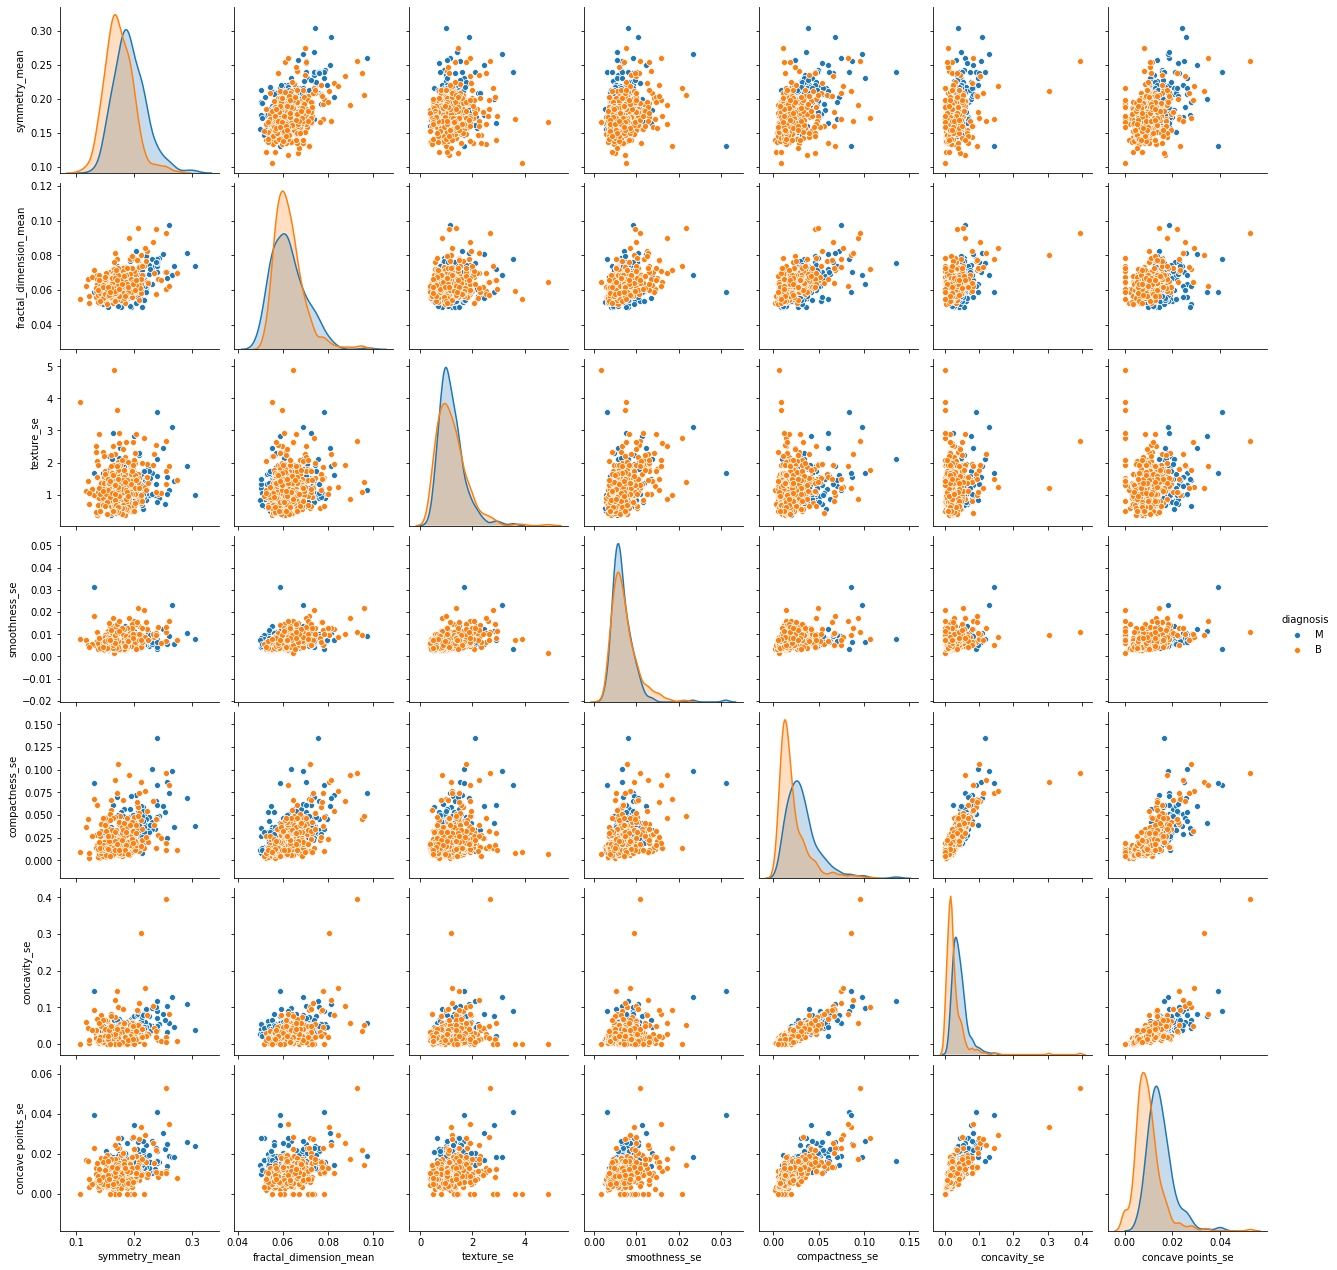

In [47]:
sns.pairplot(df[["symmetry_mean","fractal_dimension_mean","texture_se","smoothness_se","compactness_se","concavity_se","concave points_se","diagnosis"]],hue="diagnosis")

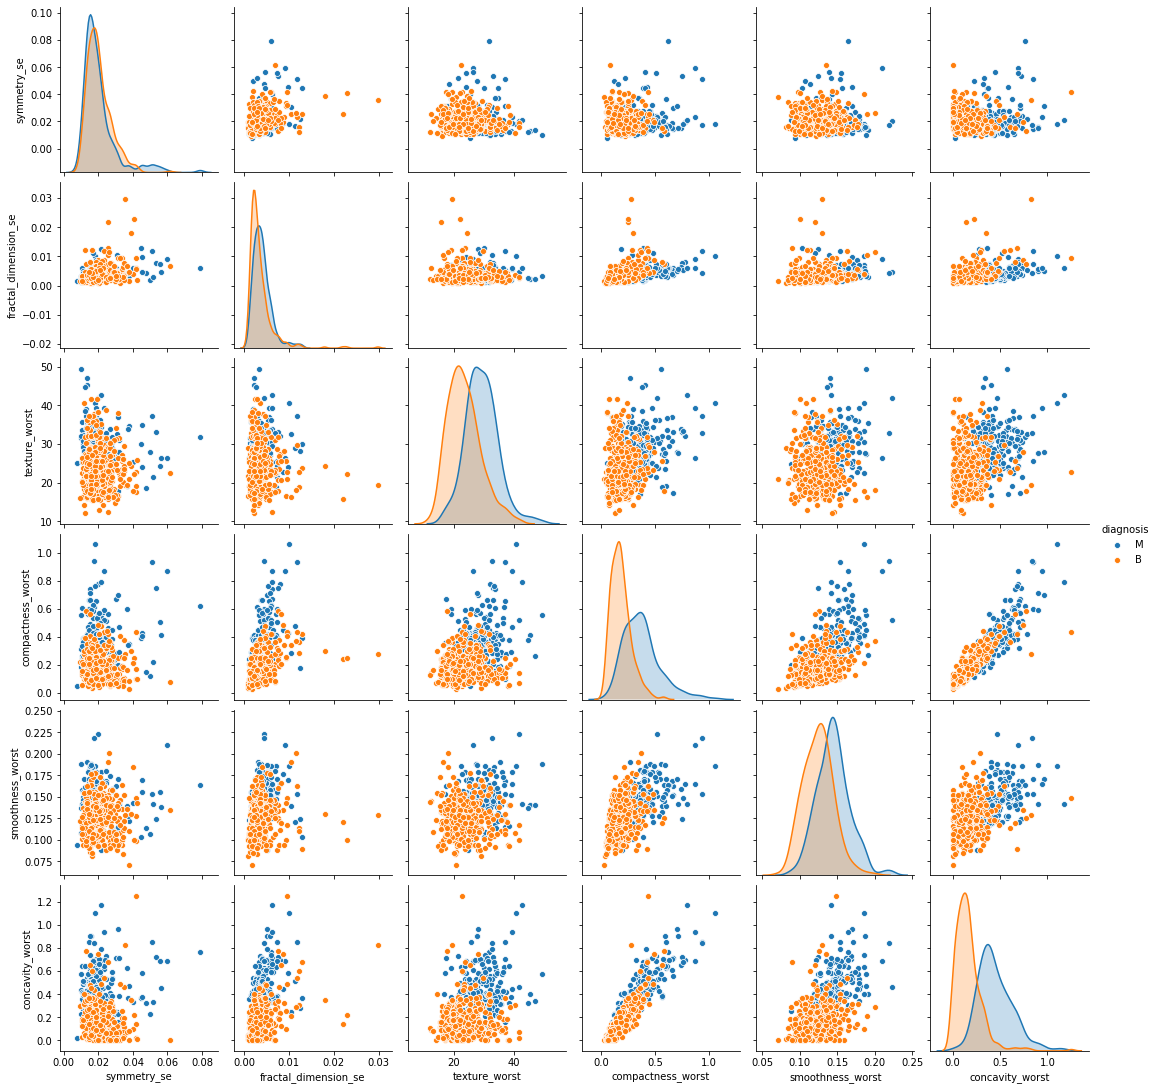

In [48]:
sns.pairplot(df[["symmetry_se","fractal_dimension_se","texture_worst","compactness_worst","smoothness_worst","diagnosis","concavity_worst"]],hue="diagnosis")

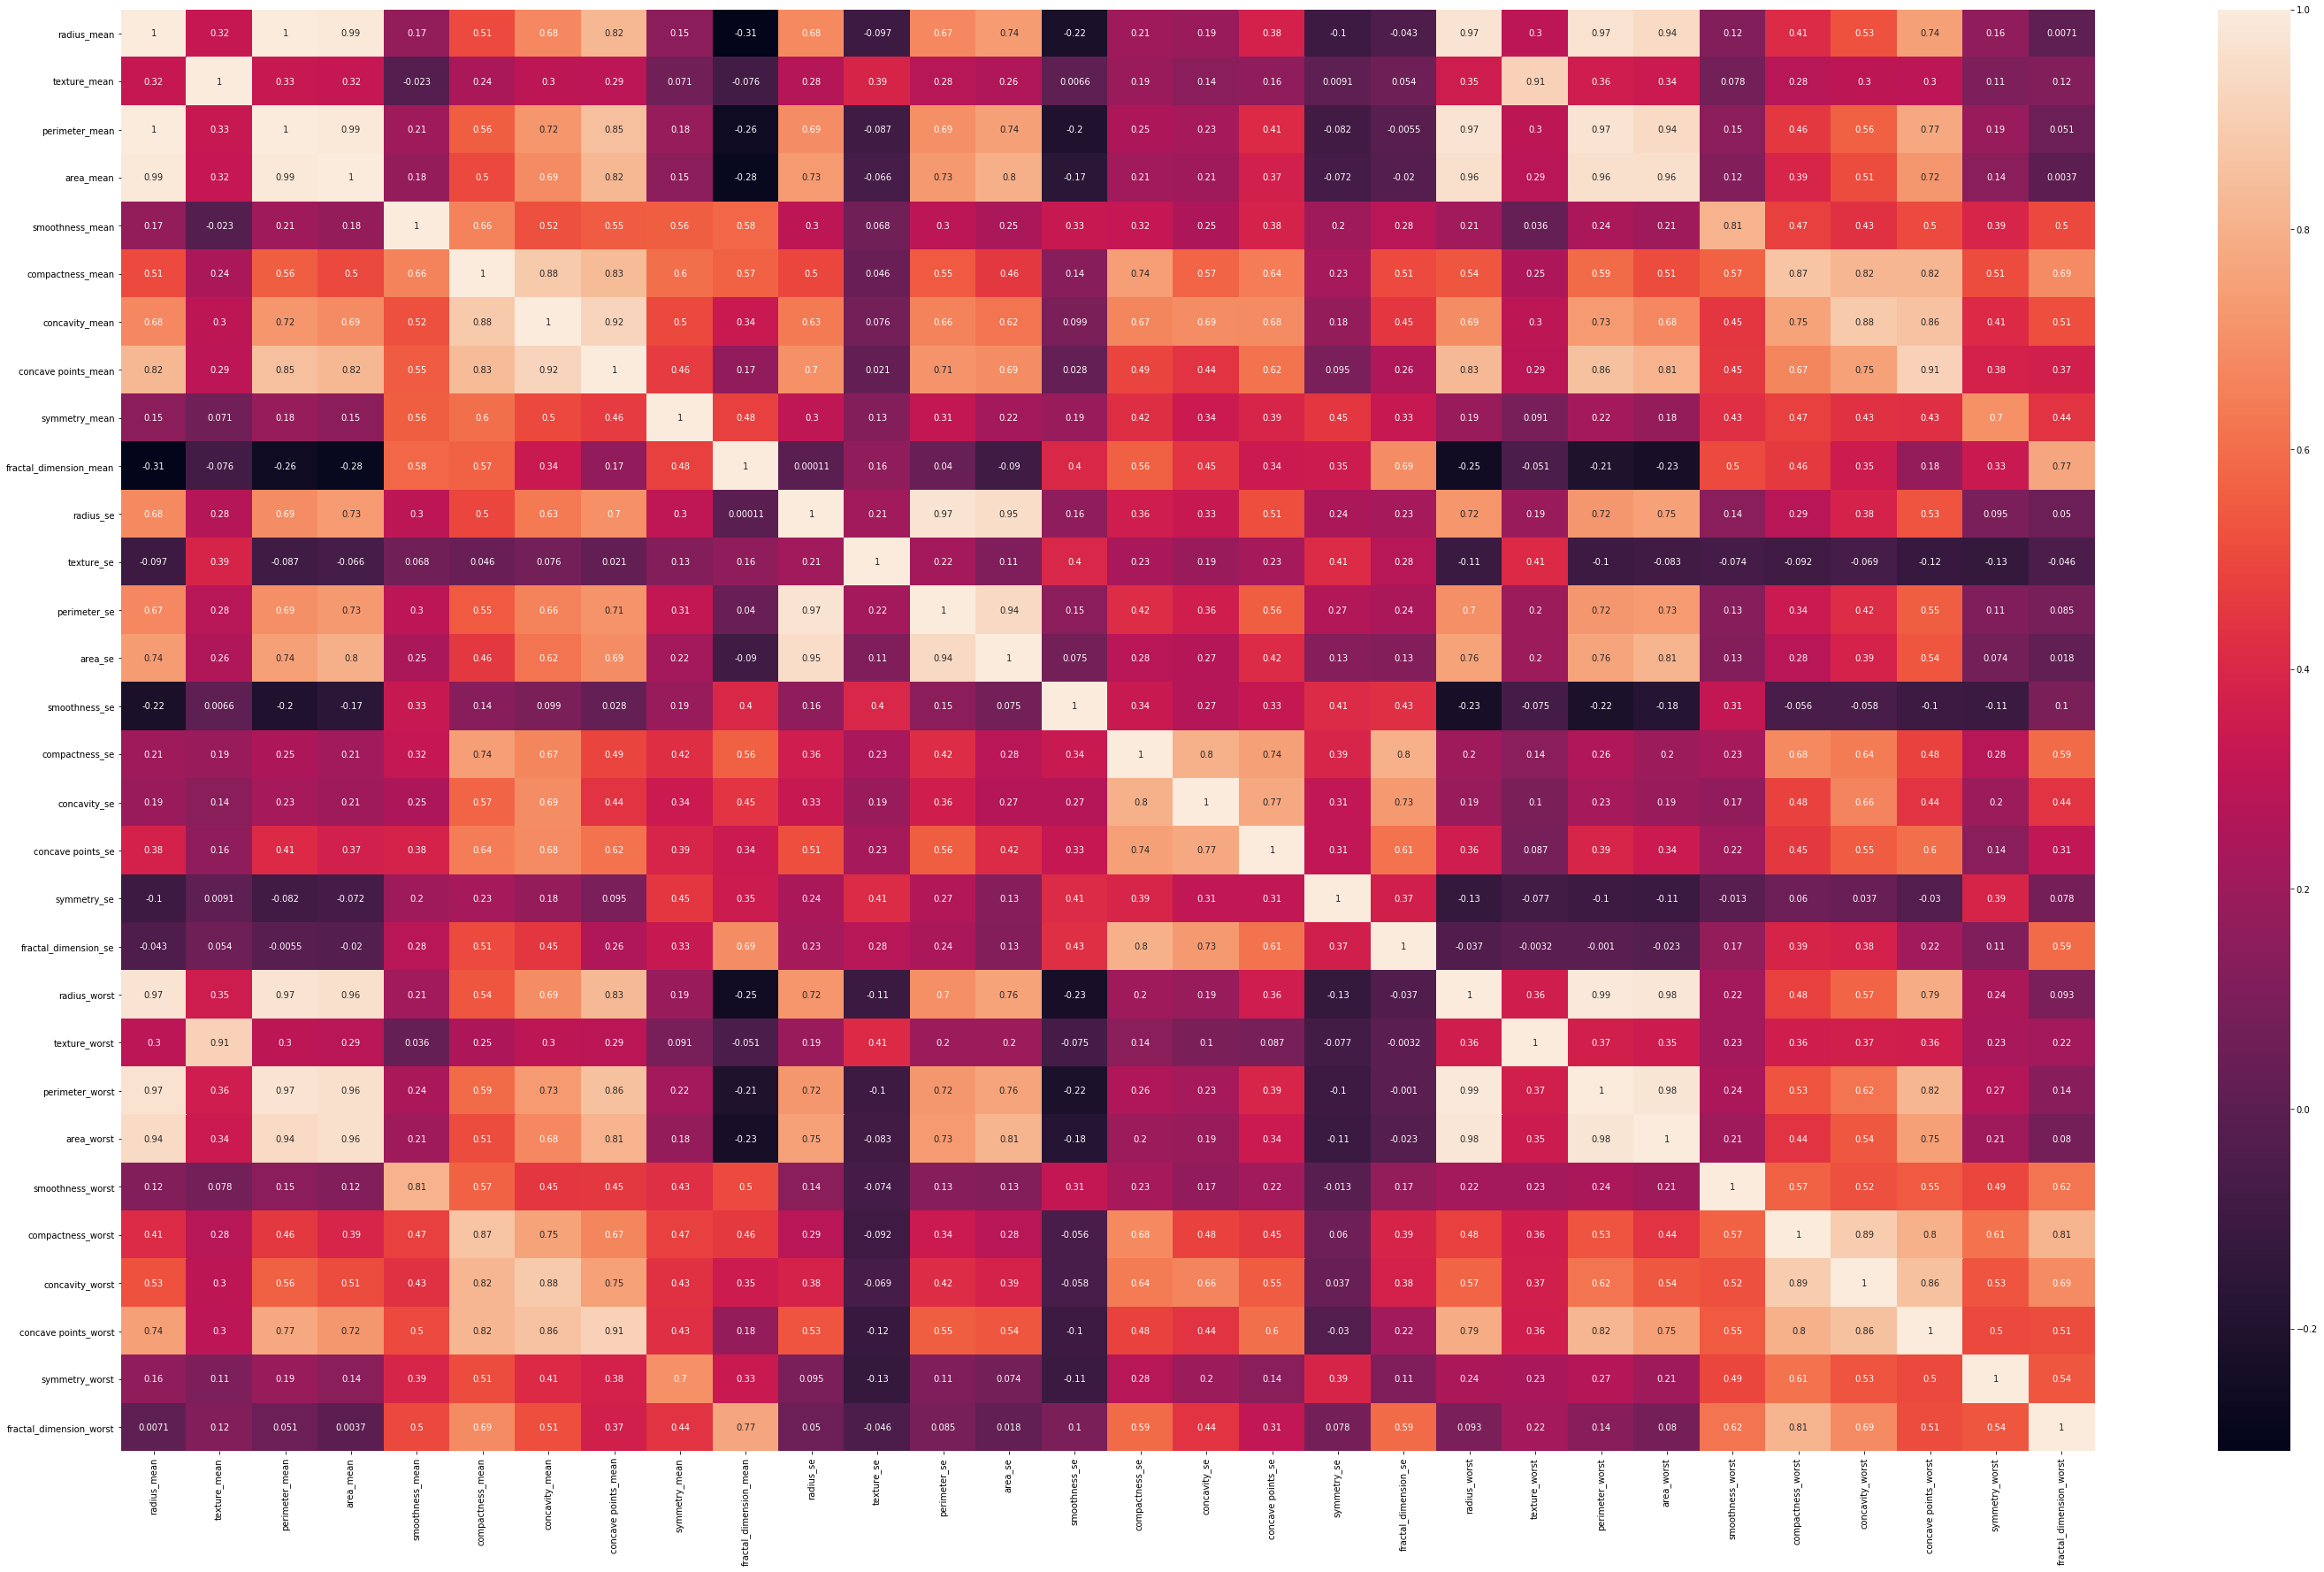

In [49]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Conclusion From Data Analysis

* Symmetric_se , fractal_dimension_se ,smoothness_se ,texture_se are the features which are not very good for classification according to Univariate and Bivariate Analysis

* From HeatMap Observation we got (radius_mean & perimeter_mean) having correaltion=1 and both with area_mean (approx) 1 , So I can drop any two of them.

* radius_se & perimeter_se are same so we can drop any one of them.

* area_se & radius_se are correlated so we can drop radius_se

### Drop bad features

In [50]:
x = x.drop(["symmetry_se","fractal_dimension_se","smoothness_se","texture_se"], axis=1)

In [51]:
x = x.drop(["radius_se","perimeter_mean","area_mean"],axis=1)

x.shape

(569, 23)

In [52]:
x.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## HIGH LEVEL THEORY FOR MODELS SELECTED

#### By Data  Exploration as we can see in the univariate and bivariate analysis , i am choosing following models:-


* Decision tree would be best because we can make decision according to every feature and go towards the homoginity and can classify better


* Random Forest : Beacause i have chosen decision trees so i am choosing this model as it creates decision tree on each sampledata and selects the best solution by means of voting.

* XgBoost : As the data is falling in imbalance side and this algorithm is an ensemble of decision trees algorithm where new trees fix errors of those trees that are already part of the model.

* Neural Network : It takes in a input, multiply it by a weight, and run it through a non-linear activation function , capable of learning the shape of just any function, given enough computational power.

* Logistic Regression : As it is a binary classification problem.



### Encoding the Features

In [53]:
from sklearn.preprocessing import LabelEncoder
lbl_y = LabelEncoder()
y= lbl_y.fit_transform(y)
print(lbl_y.fit_transform(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

#### Because i have taken Logistic  Regression & Support Vector Classifier so i am Normalizing the data

In [54]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

transformer = Normalizer().fit(x)  
x_normalized=transformer.transform(x)

In [55]:
x_normalized

array([[8.84649639e-03, 5.10431531e-03, 5.82226333e-05, ...,
        1.30509180e-04, 2.26251973e-04, 5.84685059e-05],
       [1.04718016e-02, 9.04637409e-03, 4.31395464e-05, ...,
        9.46891154e-05, 1.39997348e-04, 4.53184143e-05],
       [1.14545544e-02, 1.23620762e-02, 6.37592261e-05, ...,
        1.41363978e-04, 2.10184383e-04, 5.09492064e-05],
       ...,
       [1.46473890e-02, 2.47770290e-02, 7.46046227e-05, ...,
        1.25120467e-04, 1.95710293e-04, 6.90015552e-05],
       [1.12364011e-02, 1.59982352e-02, 6.42547599e-05, ...,
        1.44545937e-04, 2.22928017e-04, 6.76365893e-05],
       [2.78400282e-02, 8.80405015e-02, 1.88817098e-04, ...,
        0.00000000e+00, 1.03000929e-03, 2.52533451e-04]])

### Splitting the data into train and test set

In [56]:
from sklearn.model_selection import train_test_split ,StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size = 0.15, stratify=y, random_state = 17)

In [57]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [58]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Confusion Matrix 

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def ConfusionMat(model):
    cm = confusion_matrix(y_test, model.predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print("Model[{",model,"}] Testing Accuracy =",((TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line
    print("Model[{}] ROC_AUC Score =",roc_auc_score(y_test, model.predict(X_test)))

### Utility function for RandomSearchCV  & GridSearchCV-- Hypertuning

In [60]:
def randomsearchcv(model, params_grid):
    rsv = RandomizedSearchCV(model, params_grid, n_iter=50, n_jobs=-1, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
    rsv.fit(X_train, y_train)

    print('Best score:', rsv.best_score_)
    print('Best score:', rsv.best_params_)
    return rsv

In [82]:
def gridsearchcv(model,param_grid):
    gcv = GridSearchCV(log, param_grid, n_jobs=-1, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
    gcv.fit(X_train,y_train)
    print('Best score:', gcv.best_score_)
    print('Best score:', gcv.best_params_)
    return gcv

## Model Implementation

In [62]:
def models(X_train,y_train):
    
  #Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    
    
  #SVC
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    
    
  #XGBoost
    from xgboost import XGBClassifier
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train,y_train)


    
  #DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    
    
  #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
  
  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]XGBOOST Classifier Training Accuracy:', xgb.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  
    return log, svc_lin, xgb , tree, forest


#get the training results
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.979296066252588
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.979296066252588
[2]XGBOOST Classifier Training Accuracy: 1.0
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9937888198757764


#### Evaluating the implemented models on test data

In [63]:

for i in range(len(model)):
    ConfusionMat(model[i])
 


[[52  2]
 [ 1 31]]
Model[{ LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) }] Testing Accuracy = 0.9651162790697675

Model[{}] ROC_AUC Score = 0.9658564814814815
[[53  1]
 [ 1 31]]
Model[{ SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False) }] Testing Accuracy = 0.9767441860465116

Model[{}] ROC_AUC Score = 0.9751157407407408
[[52  2]
 [ 1 31]]
Model[{ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type

### XGBoost Hypertuning

In [64]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [400,500],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1,],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'max_depth':range(1,10),
    'min_child_weight': range(4,8),
    'objective':['binary:logistic'],
    'eval_metric':['auc','error']
}



gs2 = randomsearchcv(XGBClassifier(),params)

C:\Users\Lenovo\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.9910754401942926
Best score: {'reg_lambda': 1, 'reg_alpha': 1, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'eval_metric': 'error', 'booster': 'gbtree', 'base_score': 0.5}


In [65]:
ConfusionMat(gs2)

[[51  3]
 [ 1 31]]
Model[{ RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                        'booster': ['gbtree', 'gblinear'],
                                        'eval_metric': ['auc', 'error'],
                                        'gamma': [0, 0.5, 1],
           

#### To get more specific tuned parameters i applied GridSearchCV on the best parameters found by the RandomeSearchCV

In [98]:
param_grid = {
    'n_estimators': [gs2.best_params_['n_estimators']],
    'learning_rate': [gs2.best_params_['learning_rate']],
    'booster': [gs2.best_params_['booster']],
    'gamma': [gs2.best_params_['gamma']],
    'reg_alpha': [gs2.best_params_['reg_alpha']],
    'reg_lambda': [gs2.best_params_['reg_lambda']],
    'base_score': [gs2.best_params_['base_score']]
    
}



gs3 = randomsearchcv(XGBClassifier(),params)

C:\Users\Lenovo\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.9879772961816305
Best score: {'reg_lambda': 0.5, 'reg_alpha': 1, 'objective': 'binary:logistic', 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'eval_metric': 'auc', 'booster': 'gbtree', 'base_score': 0.2}


In [99]:

ConfusionMat(gs3)


[[69  3]
 [ 1 41]]
Model[{ RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                        'booster': ['gbtree', 'gblinear'],
                                        'eval_metric': ['auc', 'error'],
                                        'gamma': [0, 0.5, 1],
           

## SVC parameter tuning

In [68]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,0.0001,10],
    'kernel':['linear','rbf']
}



gs4 = randomsearchcv(SVC(),param_grid)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best score: 0.9961672738312082
Best score: {'kernel': 'linear', 'gamma': 1, 'C': 1}


In [69]:
ConfusionMat(gs4)

[[53  1]
 [ 1 31]]
Model[{ RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001,
                                                  10],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                 

## Parameter tuning for decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

param_grid  = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,30),
    "min_samples_split":range(1,20),
    "min_samples_leaf":range(1,15)
}



gs5 = randomsearchcv(DecisionTreeClassifier(),param_grid)

Best score: 0.9702504553734063
Best score: {'min_samples_split': 10, 'min_samples_leaf': 14, 'max_depth': 18, 'criterion': 'entropy'}


In [71]:
ConfusionMat(gs5)

[[51  3]
 [ 1 31]]
Model[{ RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                 

In [72]:

'''roc_auc_score(y_train,model_5.predict_proba(X_train)[:,1])'''

'roc_auc_score(y_train,model_5.predict_proba(X_train)[:,1])'

In [73]:
'''
cm = confusion_matrix(y_test, model_5.predict(X_test))
 
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
 
print(cm)
print("Model[{}] Testing Accuracy =",((TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line
'''

'\ncm = confusion_matrix(y_test, model_5.predict(X_test))\n \nTN = cm[0][0]\nTP = cm[1][1]\nFN = cm[1][0]\nFP = cm[0][1]\n \nprint(cm)\nprint("Model[{}] Testing Accuracy =",((TP + TN) / (TP + TN + FN + FP)))\nprint()# Print a new line\n'

## LightGBM

In [74]:
#!pip install lightgbm
import lightgbm as lgb

In [75]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train,y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
lgbm.score(X_train,y_train)

1.0

In [77]:
lgbm.score(X_test,y_test)

0.9534883720930233

In [78]:
ConfusionMat(lgbm)

[[52  2]
 [ 2 30]]
Model[{ LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) }] Testing Accuracy = 0.9534883720930233

Model[{}] ROC_AUC Score = 0.9502314814814816


* LightGBM is clearly overfitting

### Logistic Regression

In [79]:
param_grid={

'penalty' : ['l1','l2'],
'C' : np.arange(0,1,0.001)
}


In [83]:
#Giving more importance to the Precision

#from sklearn.metrics import fbeta_score, make_scorer

#ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [84]:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)


model = gridsearchcv(log , param_grid)

Best score: 0.9947072879330945
Best score: {'C': 0.642, 'penalty': 'l2'}


In [85]:
ConfusionMat(model)

[[52  2]
 [ 1 31]]
Model[{ GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecate...
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0

## Neural Network

In [86]:
X_train.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size = 0.20, stratify=y, random_state = 17)

In [90]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.model_selection import cross_val_score
from tensorflow.keras import layers , models

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
##Neural Network 2 hidden layer model

NN = models.Sequential()
NN.add(layers.Dense(23,activation='relu'))
NN.add(layers.Dense(15,activation='relu'))
NN.add(layers.Dense(10,activation='relu'))
NN.add(layers.Dense(1,activation='sigmoid'))


In [93]:
NN.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy', metrics.AUC()])

history = NN.fit(X_train , y_train , batch_size=10, epochs=20,verbose =1)


Epoch 1/20
455/455 [==============================] - 1s 1ms/sample - loss: 0.5806 - accuracy: 0.7824 - auc: 0.7762
Epoch 2/20
455/455 [==============================] - 0s 237us/sample - loss: 0.3584 - accuracy: 0.9121 - auc: 0.9629
Epoch 3/20
455/455 [==============================] - 0s 226us/sample - loss: 0.2335 - accuracy: 0.9231 - auc: 0.9787
Epoch 4/20
455/455 [==============================] - 0s 247us/sample - loss: 0.1717 - accuracy: 0.9451 - auc: 0.9865
Epoch 5/20
455/455 [==============================] - 0s 210us/sample - loss: 0.1413 - accuracy: 0.9451 - auc: 0.9896
Epoch 6/20
455/455 [==============================] - 0s 238us/sample - loss: 0.1181 - accuracy: 0.9648 - auc: 0.9918
Epoch 7/20
455/455 [==============================] - 0s 252us/sample - loss: 0.1023 - accuracy: 0.9670 - auc: 0.9943
Epoch 8/20
455/455 [==============================] - 0s 230us/sample - loss: 0.0889 - accuracy: 0.9692 - auc: 0.9954
Epoch 9/20
455/455 [==============================] - 0s 2

In [94]:
score = NN.evaluate(X_test,y_test )

114/114 [==============================] - 0s 1ms/sample - loss: 0.0586 - accuracy: 0.9737 - auc: 0.9977


## BEST MODEL

#### As it is a binary classification problem so I chose the AUC_ROC score

* Neural Network its AUC Score : 99% & accuracy 97% so definetly its best score in this evaluation
* For Machine Learning model Support Vector Classifier is giving the highest ROC_AUC_Score = 97% nad accuracy of 97%